In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["axes.grid"] = False
import scipy.signal
import mne
import ast

In [2]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

### ECG

In [3]:
sesion = pd.read_csv("datos.csv")[['timestamp', 'sample_number', 'channel_data']]
sesion.channel_data = sesion.channel_data.apply(ast.literal_eval)
# print(sesion.dtypes)
sesion.head()

,timestamp,sample_number,channel_data
0,9765251,1,"[-463934, -228444, 2841423, 5761243, 7267673, ..."
1,9767259,2,"[-462884, -219489, 2840349, 5760598, 7267627, ..."
2,9769266,3,"[-462441, -209943, 2840523, 5760658, 7267528, ..."
3,9771274,4,"[-462387, -202056, 2840605, 5760613, 7267538, ..."
4,9773280,5,"[-461574, -201507, 2840661, 5760746, 7267750, ..."


In [4]:
channel_data_df = sesion.channel_data.apply(pd.Series) * 2.4 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
sesion = pd.concat([sesion.drop('channel_data', axis=1), channel_data_df], axis=1)
sesion.timestamp = sesion.timestamp.apply(lambda x: (x - sesion.timestamp.iloc[0]) / 10 ** 6)
sesion.head()

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,-0.132733,-0.065358,0.812938,1.648305,2.079298,2.078446,1.994339,1.993735
1,0.002008,2,-0.132432,-0.062796,0.812630,1.648121,2.079285,2.078443,1.994297,1.993697
2,0.004015,3,-0.132305,-0.060065,0.812680,1.648138,2.079257,2.078414,1.994308,1.993708
3,0.006023,4,-0.132290,-0.057809,0.812704,1.648125,2.079260,2.078405,1.994244,1.993644
4,0.008029,5,-0.132057,-0.057652,0.812720,1.648163,2.079320,2.078458,1.994336,1.993737


In [5]:
sesion.shape

(5000, 10)

In [6]:
x1 = sesion.channel_1*1000
x2 = sesion.channel_2*1000
#x3 = sesion.channel_3*1000
t = sesion.timestamp

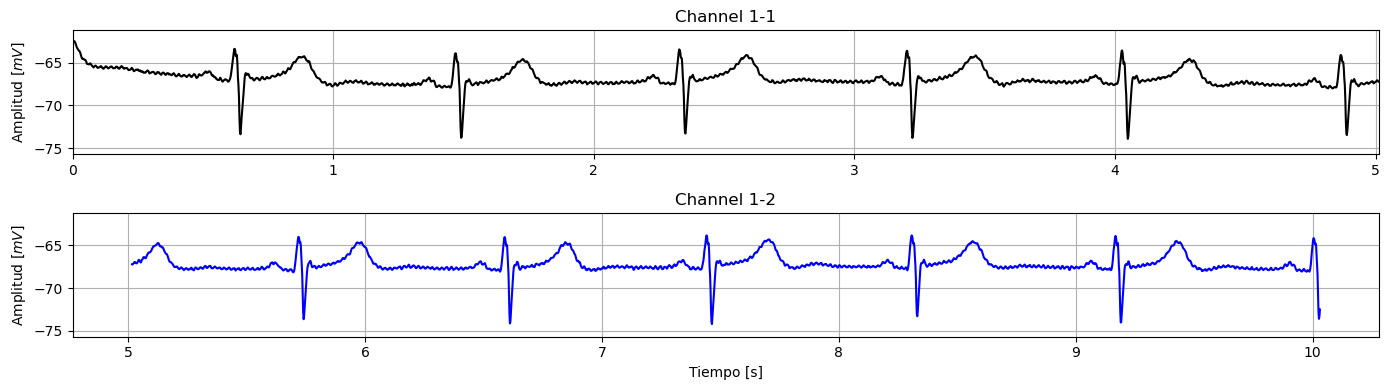

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x1[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
axs[0].set_title('Channel 1-1')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x1[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
axs[1].set_title('Channel 1-2')
axs[1].grid()

# plt.show()

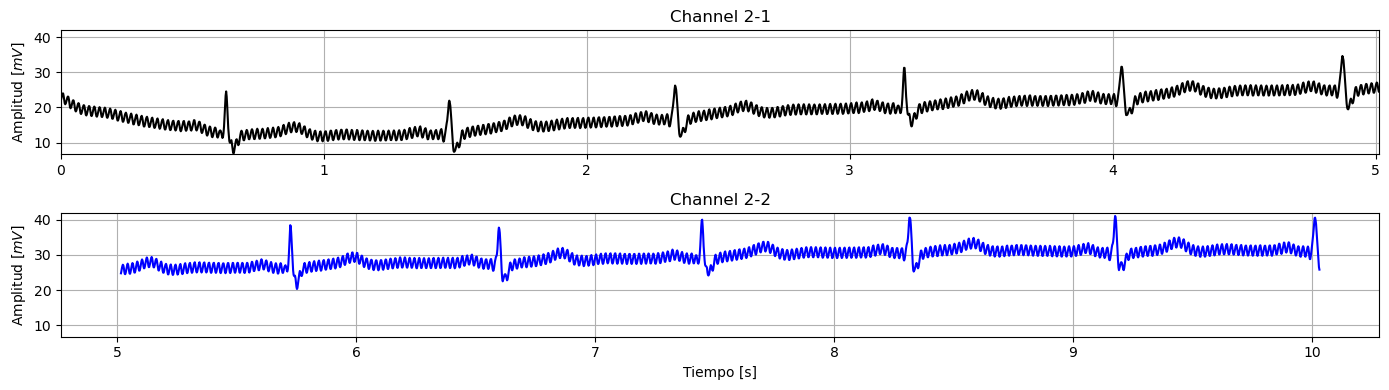

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x2[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
axs[0].set_title('Channel 2-1')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x2[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
axs[1].set_title('Channel 2-2')
axs[1].grid()

# plt.show()

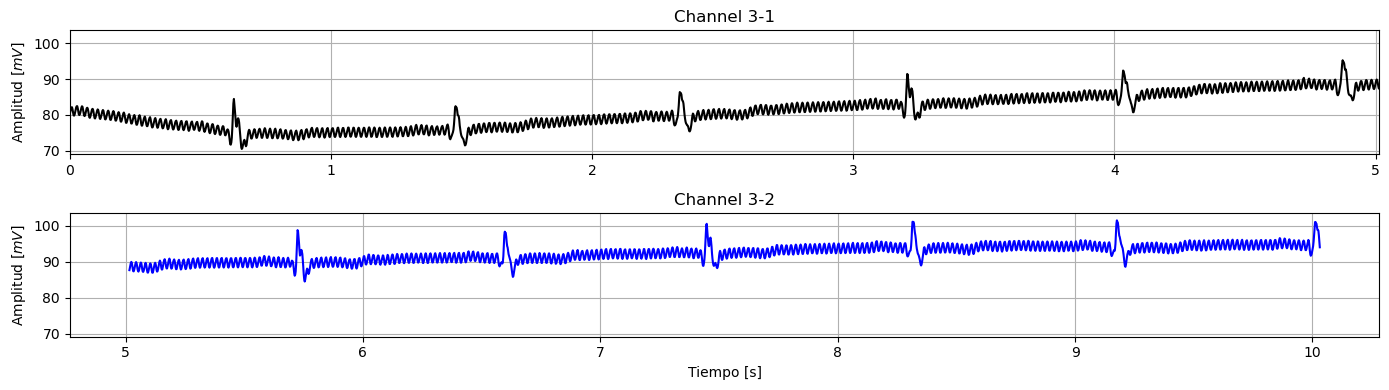

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x3[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x3.min() - abs(x3.min() * 0.02), x3.max() +  abs(x3.max() * 0.02)])
axs[0].set_title('Channel 3-1')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x3[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x3.min() - abs(x3.min() * 0.02), x3.max() +  abs(x3.max() * 0.02)])
axs[1].set_title('Channel 3-2')
axs[1].grid()

# plt.show()

In [13]:
filtered_I = bandpass(x1, [1, 35], 500.)
filtered_II = bandpass(x2, [1, 35], 500.)
filtered_III = bandpass(x3, [1, 35], 500.)

In [12]:
if abs(filtered.max()) > abs(filtered.min()):
    y_lim = [np.mean(filtered) - abs(filtered.max() * 1.2), np.mean(filtered) + abs(filtered.max() * 1.2)]
else:
    y_lim = [np.mean(filtered) - abs(filtered.min() * 1.2), np.mean(filtered) + abs(filtered.min() * 1.2)]

NameError: name 'filtered' is not defined

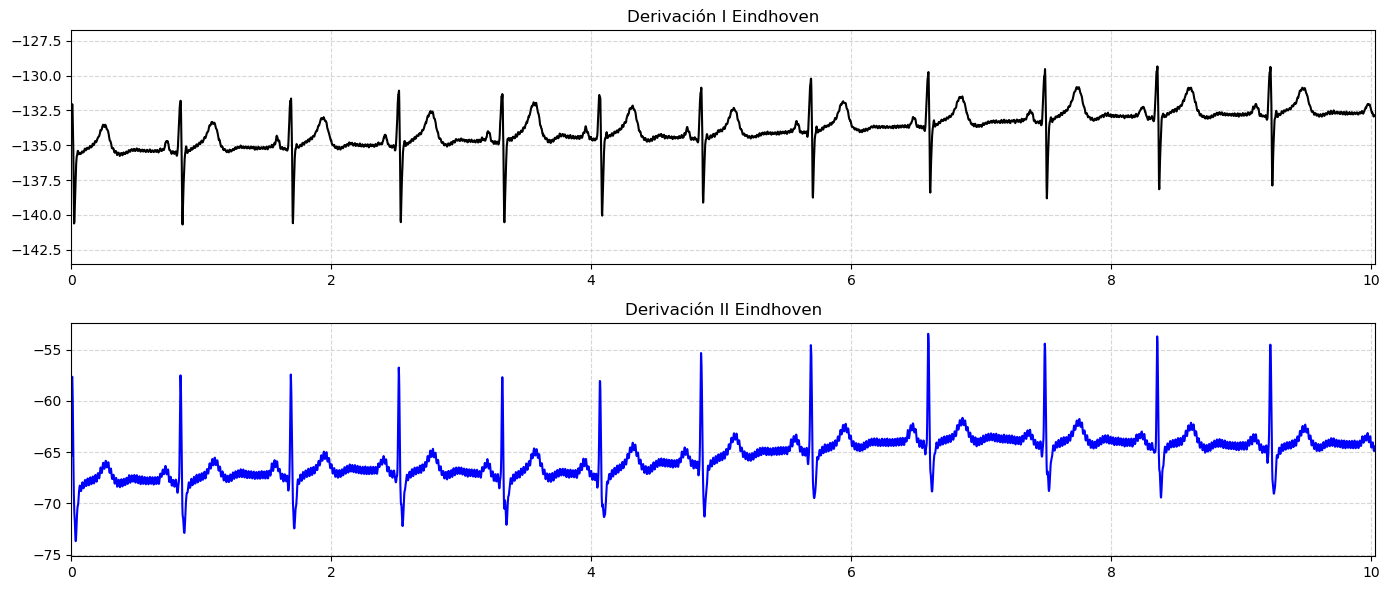

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 6), tight_layout=True)
ax1.plot(t, x1, lw=1.5, color='k')
ax1.set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
ax1.set_xlim([t.min(), t.max()])
ax1.set_title("Derivación I Eindhoven")#"Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')

ax2.plot(t, x2, lw=1.5, color='b')
ax2.set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
#ax2.set_ylim([-5.2, 5.2])
ax2.set_xlim([t.min(), t.max()])
ax2.set_title("Derivación II Eindhoven")#"Band-Pass IIR Filter (1-35 Hz)")
ax2.grid(alpha=.5, ls='--')

# ax3.plot(t, x3, lw=1.5, color='r')
# ax3.set_ylim([x3.min() - abs(x3.min() * 0.02), x3.max() +  abs(x3.max() * 0.02)])
# ax3.set_xlim([t.min(), t.max()])
# ax3.set_title("Derivación III Eindhoven")#"Band-Pass IIR Filter (1-35 Hz)")
# ax3.grid(alpha=.5, ls='--')

## MNE PROCESSING

In [45]:
signal_1 = pd.read_csv("datoss_9.csv")[['timestamp', 'sample_number', 'channel_data']]
signal_2 = pd.read_csv("datoss_10.csv")[['timestamp', 'sample_number', 'channel_data']]
signal_1.channel_data = signal_1.channel_data.apply(ast.literal_eval)
signal_2.channel_data = signal_2.channel_data.apply(ast.literal_eval)

In [46]:
channel_data_df = signal_1.channel_data.apply(pd.Series) * 2.4 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
columnas_a_eliminar = ['channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
channel_data_df = channel_data_df.drop(columns=columnas_a_eliminar)
channel_data_df.shape

(5000, 2)

In [47]:
signal_1 = pd.concat([signal_1.drop('channel_data', axis=1), channel_data_df], axis=1)
signal_1.timestamp = signal_1.timestamp.apply(lambda x: (x - signal_1.timestamp.iloc[0]) / 10 ** 6)
signal_1.shape

(5000, 4)

In [48]:
channel_data_df = signal_2.channel_data.apply(pd.Series) * 2.4 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
columnas_a_eliminar = ['channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
channel_data_df = channel_data_df.drop(columns=columnas_a_eliminar)
channel_data_df.shape

(5000, 2)

In [49]:
signal_2 = pd.concat([signal_2.drop('channel_data', axis=1), channel_data_df], axis=1)
signal_2.timestamp = signal_2.timestamp.apply(lambda x: (x - signal_2.timestamp.iloc[0]) / 10 ** 6)
signal_2.shape

(5000, 4)

In [50]:
fs = 500.
info_1 = mne.create_info(['O2','Fp2'], 
                       sfreq=fs, ch_types='eeg')
info_1.set_montage('standard_1020')
info_1['description'] = 'Pruebas de EEG'
info_1['device_info'] = {'type':'Frontend', 'model':'AD1298'}
info_1['experimenter'] = 'Eloy'
info_1['line_freq'] = 50.0
info_1['subject_info'] = {'id':1,'last_name':'Yapur','first_name':'Jhoseline',
                        'birthday':(2002, 5, 12),'sex':2,'hand':1}
data_1 = signal_1.loc[:, 'channel_1':'channel_2'].values.T
eeg_raw_1 = mne.io.RawArray(data_1, info_1, verbose=True)

Creating RawArray with float64 data, n_channels=2, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.


In [51]:
info_2 = mne.create_info(['O2','Fp2'], 
                         sfreq=fs, ch_types='eeg')
info_2.set_montage('standard_1020')
info_2['description'] = 'Pruebas de EEG'
info_2['device_info'] = {'type':'Frontend', 'model':'AD1298'}
info_2['experimenter'] = 'Eloy'
info_2['line_freq'] = 50.0
info_2['subject_info'] = {'id':1,'last_name':'Yapur','first_name':'Jhoseline',
                        'birthday':(2002, 5, 12),'sex':2,'hand':1}
data_2 = signal_2.loc[:, 'channel_1':'channel_2'].values.T
eeg_raw_2 = mne.io.RawArray(data_2, info_2, verbose=True)

Creating RawArray with float64 data, n_channels=2, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.


In [23]:
eeg_raw_2.describe()

<RawArray | 2 x 5000 (10.0 s), ~89 kB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fpz   EEG   µV     -4090.40   -1725.48    1063.73    1942.28    3445.82
 1  Fp1   EEG   µV     55592.26   56960.90   61206.01   62962.32   64286.34


### Filtrado

In [52]:
eeg_raw_f_1 = eeg_raw_1.copy()
eeg_raw_f_2 = eeg_raw_2.copy()

In [53]:
fl, fh = 0.5, 35.
eeg_raw_f_1.filter(l_freq=fl, h_freq=fh, method='fir', phase='zero-double', fir_window='hamming', 
               fir_design='firwin', pad='reflect_limited', verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-12 dB cutoff frequency: 39.38 Hz)
- Filter length: 3301 samples (6.602 s)



<RawArray | 2 x 5000 (10.0 s), ~89 kB, data loaded>

In [54]:
eeg_raw_f_2.filter(l_freq=fl, h_freq=fh, method='fir', phase='zero-double', fir_window='hamming', 
               fir_design='firwin', pad='reflect_limited', verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-12 dB cutoff frequency: 39.38 Hz)
- Filter length: 3301 samples (6.602 s)



<RawArray | 2 x 5000 (10.0 s), ~89 kB, data loaded>

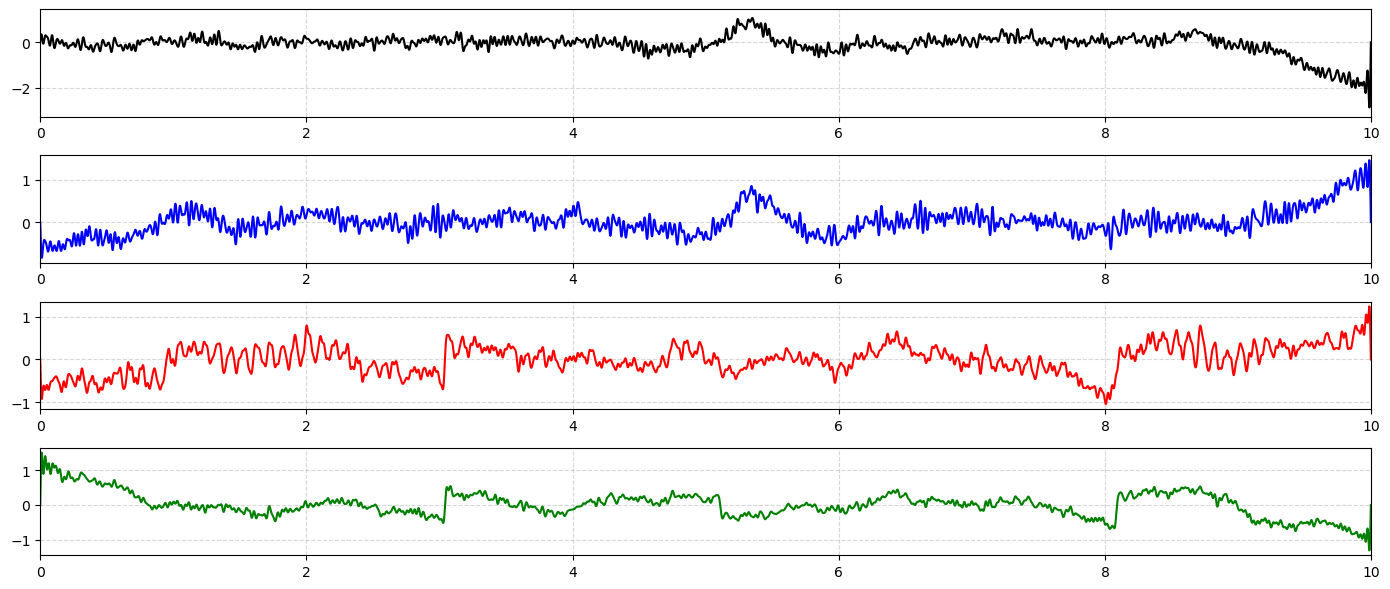

In [55]:
x1, t = eeg_raw_f_1.get_data(return_times=True, units='mV')
x2, t = eeg_raw_f_2.get_data(return_times=True, units='mV')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, num=0, figsize=(14, 6), tight_layout=True)
ax1.plot(t, x1[0], lw=1.5, color='k')
# ax1.set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
ax1.set_xlim([t.min(), 10])
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')

ax2.plot(t, x1[1], lw=1.5, color='b')
# ax2.set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
# ax2.set_ylim([-1.6, 1.4])
ax2.set_xlim([t.min(), 10])
ax2.grid(alpha=.5, ls='--')

ax3.plot(t, x2[0], lw=1.5, color='r')
ax3.set_xlim([t.min(), 10])
ax3.grid(alpha=.5, ls='--')

ax4.plot(t, x2[1], lw=1.5, color='g')
ax4.set_xlim([t.min(), 10])
ax4.grid(alpha=.5, ls='--')

In [28]:
x1[1].shape

(5000,)

### SPECTRAL ANALYSIS

Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


C:\Users\ELOY\AppData\Local\Temp\ipykernel_11632\2349201039.py:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = eeg_PSD_f_1.plot(dB=True, color='k', spatial_colors=True)
C:\Users\ELOY\miniconda3\envs\eeg\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


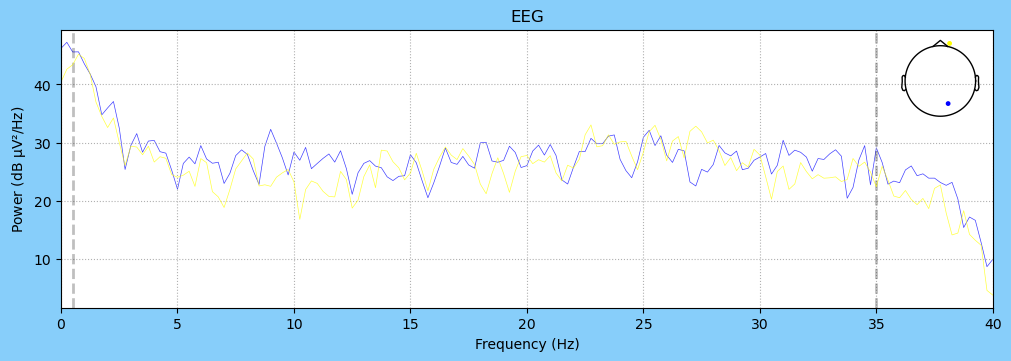

In [63]:
ventana = 4
win = int(ventana * fs)
eeg_PSD_f_1 = eeg_raw_f_1.compute_psd(fmax=40.0, picks='data', n_fft=win, n_overlap=win // 2, 
                          n_per_seg=win, window='hann')

fig = eeg_PSD_f_1.plot(dB=True, color='k', spatial_colors=True)
fig.set_facecolor('lightskyblue')

Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


C:\Users\ELOY\AppData\Local\Temp\ipykernel_11632\1745006524.py:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = eeg_PSD_f_2.plot(dB=True, color='k', spatial_colors=True)
C:\Users\ELOY\miniconda3\envs\eeg\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


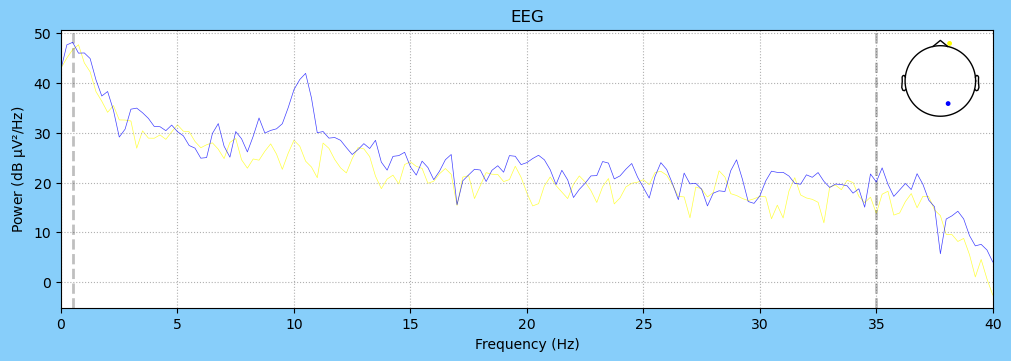

In [62]:
eeg_PSD_f_2 = eeg_raw_f_2.compute_psd(fmax=40.0, picks='data', n_fft=win, n_overlap=win // 2, 
                          n_per_seg=win, window='hann')

fig = eeg_PSD_f_2.plot(dB=True, color='k', spatial_colors=True)
fig.set_facecolor('lightskyblue')
plt.show()

In [35]:
fig = eeg_raw_f_1.plot()
fig.fake_keypress("a")  # Simulates user pressing 'a' on the keyboard.

Using qt as 2D backend.
Channels marked as bad:
none


In [19]:
ica = mne.preprocessing.ICA(n_components=2, max_iter="auto", random_state=97)
ica.fit(eeg_raw_f_1)
ica

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.6s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,14 iterations on raw data (5000 samples)
ICA components,2
Available PCA components,2
Channel types,eeg
ICA components marked for exclusion,—


In [20]:
eeg_raw_f_1.load_data()
ica.plot_sources(eeg_raw_f_1, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=2, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.
Using qt as 2D backend.


In [21]:
# blinks
ica.exclude = [0]

In [27]:
# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = eeg_raw_f_1.copy()
ica.apply(reconst_raw)

# eeg_raw_f_1.plot(show_scrollbars=False)
# reconst_raw.plot(show_scrollbars=False)
# del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 1 ICA component
    Projecting back using 2 PCA components


<RawArray | 2 x 5000 (10.0 s), ~89 kB, data loaded>

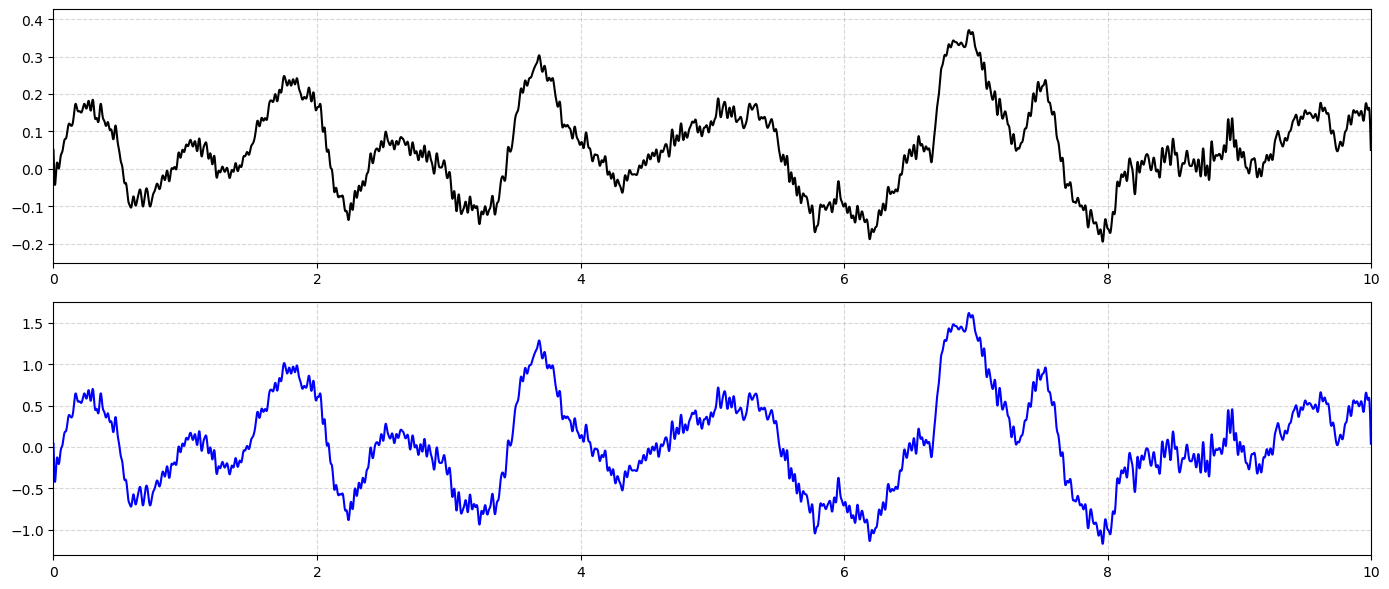

In [28]:
x1, t = reconst_raw.get_data(return_times=True, units='mV')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 6), tight_layout=True)
ax1.plot(t, x1[0], lw=1.5, color='k')
# ax1.set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
ax1.set_xlim([t.min(), 10])
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')

ax2.plot(t, x1[1], lw=1.5, color='b')
# ax2.set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
# ax2.set_ylim([-1.6, 1.4])
ax2.set_xlim([t.min(), 10])
ax2.grid(alpha=.5, ls='--')

Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


C:\Users\ELOY\AppData\Local\Temp\ipykernel_14520\2808783787.py:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = eeg_PSD_f_1.plot(dB=True, color='k', spatial_colors=False)
C:\Users\ELOY\miniconda3\envs\eeg\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


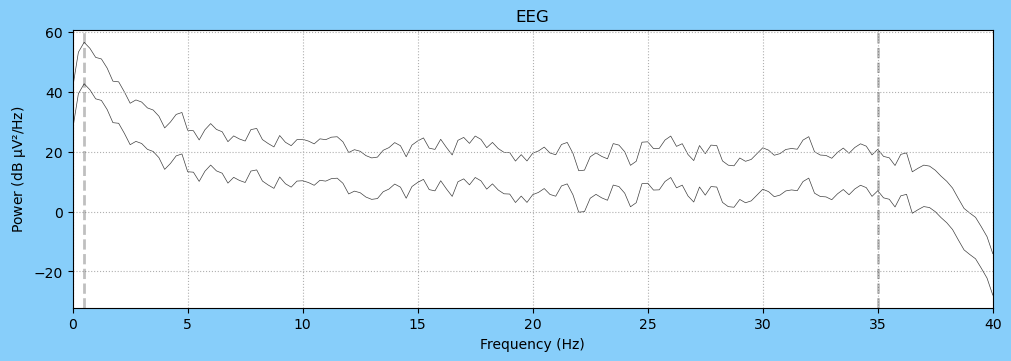

In [44]:
ventana = 4
win = int(ventana * fs)
eeg_PSD_f_1 = reconst_raw.compute_psd(fmax=40.0, picks='data', n_fft=win, n_overlap=win // 2, 
                          n_per_seg=win, window='hann')

fig = eeg_PSD_f_1.plot(dB=True, color='k', spatial_colors=False)
fig.set_facecolor('lightskyblue')

In [37]:
ica2 = mne.preprocessing.ICA(n_components=2, max_iter="auto", random_state=97)
ica2.fit(eeg_raw_f_2)
ica2

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.0s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,5 iterations on raw data (5000 samples)
ICA components,2
Available PCA components,2
Channel types,eeg
ICA components marked for exclusion,—


In [40]:
eeg_raw_f_2.load_data()
ica2.plot_sources(eeg_raw_f_2, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=2, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.


In [41]:
# blinks
ica2.exclude = [0]

In [42]:
# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw_2 = eeg_raw_f_2.copy()
ica2.apply(reconst_raw_2)

# eeg_raw_f_1.plot(show_scrollbars=False)
# reconst_raw.plot(show_scrollbars=False)
# del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 1 ICA component
    Projecting back using 2 PCA components


<RawArray | 2 x 5000 (10.0 s), ~89 kB, data loaded>

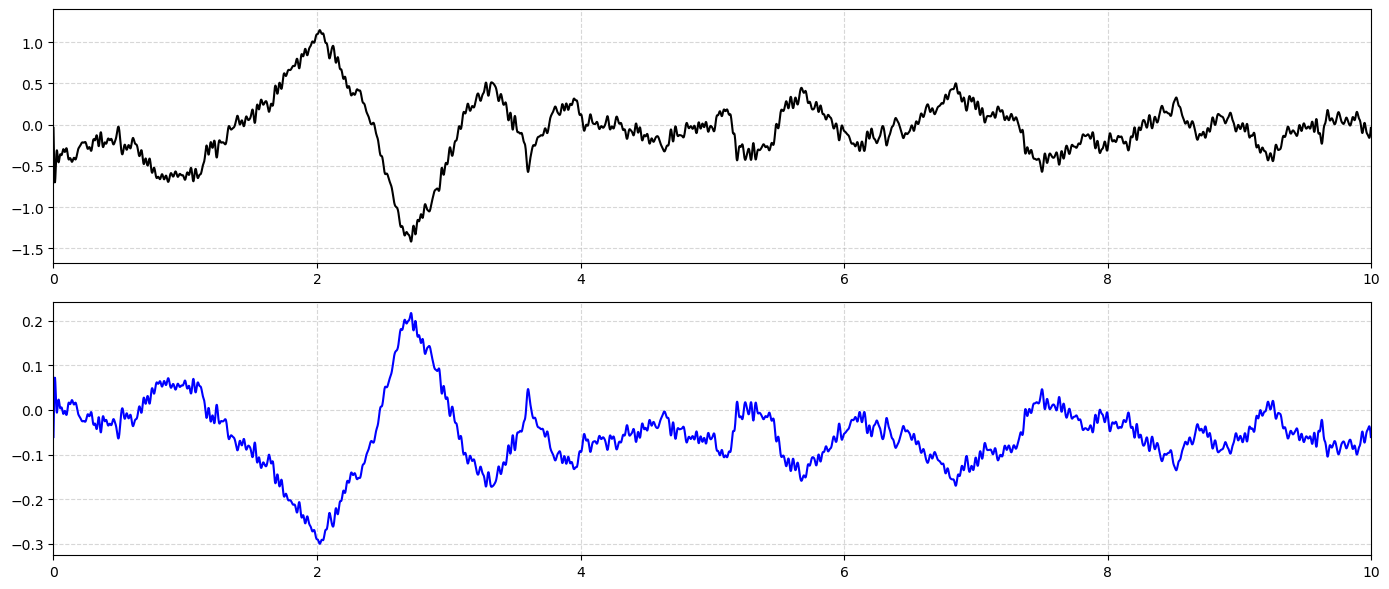

In [43]:
x2, t = reconst_raw_2.get_data(return_times=True, units='mV')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 6), tight_layout=True)
ax1.plot(t, x2[0], lw=1.5, color='k')
# ax1.set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
ax1.set_xlim([t.min(), 10])
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')

ax2.plot(t, x2[1], lw=1.5, color='b')
# ax2.set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
# ax2.set_ylim([-1.6, 1.4])
ax2.set_xlim([t.min(), 10])
ax2.grid(alpha=.5, ls='--')

Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


C:\Users\ELOY\AppData\Local\Temp\ipykernel_14520\1922063374.py:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = eeg_PSD_f_2.plot(dB=True, color='k', spatial_colors=False)
C:\Users\ELOY\miniconda3\envs\eeg\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


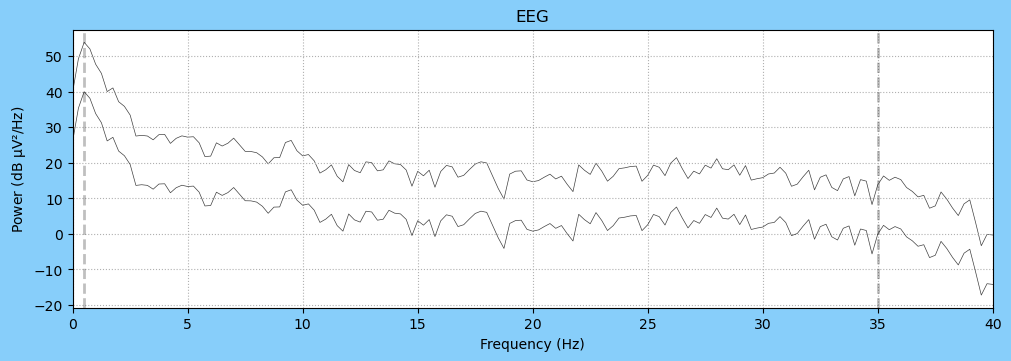

In [45]:
ventana = 4
win = int(ventana * fs)
eeg_PSD_f_2 = reconst_raw_2.compute_psd(fmax=40.0, picks='data', n_fft=win, n_overlap=win // 2, 
                          n_per_seg=win, window='hann')

fig = eeg_PSD_f_2.plot(dB=True, color='k', spatial_colors=False)
fig.set_facecolor('lightskyblue')